In [ ]:
"""Importing libraries"""
import pandas as pd
import numpy as np

In [ ]:
"""Reading the dataset"""
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
"""Top 5 values of the dataset"""
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [ ]:
"""Information of the dataset"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
"""Describing the dataset"""
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.985000
std,13.969007,26.264721,25.823522,1.140737
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,1.000000
50%,36.000000,61.500000,50.000000,2.000000
75%,49.000000,78.000000,73.000000,3.000000
max,70.000000,137.000000,99.000000,4.000000


In [ ]:
"""Finding Null values"""
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
"""Importing libraries to help with visualising the data"""
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

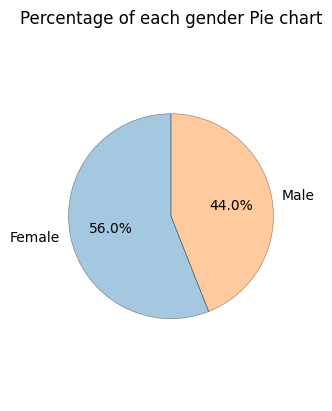

In [ ]:
"""Plotting the percetage distribution of the gender (Piechart)"""
plt.subplot(1,2,2)
plt.title("Percentage of each gender Pie chart")
df['Gender'].value_counts().plot(kind='pie',
                                 legend=None,
                                 ylabel='',
                                 startangle=90,
                                 wedgeprops={'alpha':0.4,
                                             'edgecolor' : 'black',
                                             'linewidth': 0.5,
                                             'antialiased': True},
                                 autopct='%1.1f%%')

# plt.legend(mall_data.gender.value_counts().index, loc='upper left')
plt.axis('equal')
plt.show()


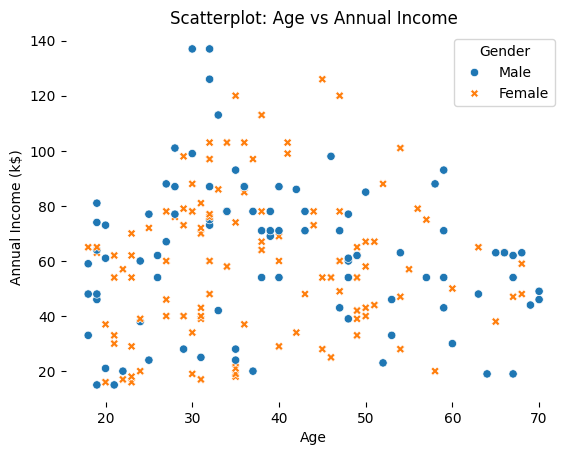

In [ ]:
"""Scatterplot: Age vs Annual Income"""
plt.title("Scatterplot: Age vs Annual Income", fontsize=12)

sns.scatterplot(data=df,
                x='Age',
                y='Annual Income (k$)',
                hue='Gender',
                style='Gender')

plt.box(None)
plt.show()

<ipython-input-64-1c08f4bd0ac8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')


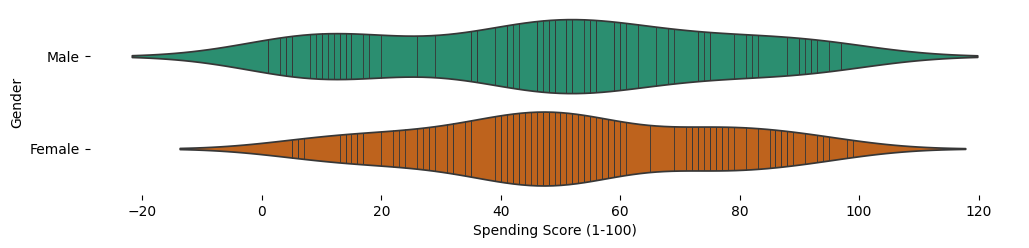

In [ ]:
# @title Gender vs Spending Score (1-100)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
"""Drop unnecessary columns if any"""
df = df.drop('CustomerID', axis=1)

In [ ]:
"""Feature Normalization"""
from sklearn.preprocessing import MinMaxScaler

# Feature normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
"""Fitting the variables"""
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

inertia

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51084.505954934364,
 44344.94980177718,
 40953.73845841784]

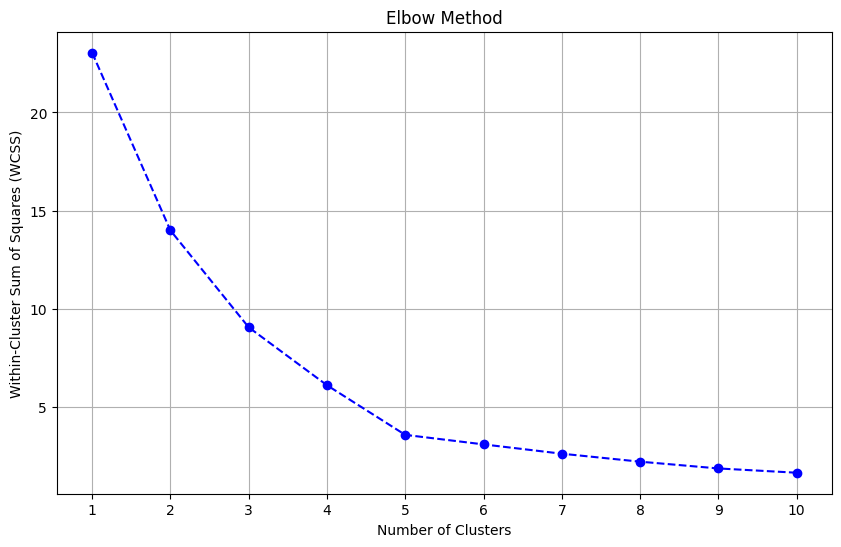

In [ ]:
"""Plotting the Elbow Method graph with styling"""
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
"""importing libraries"""
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

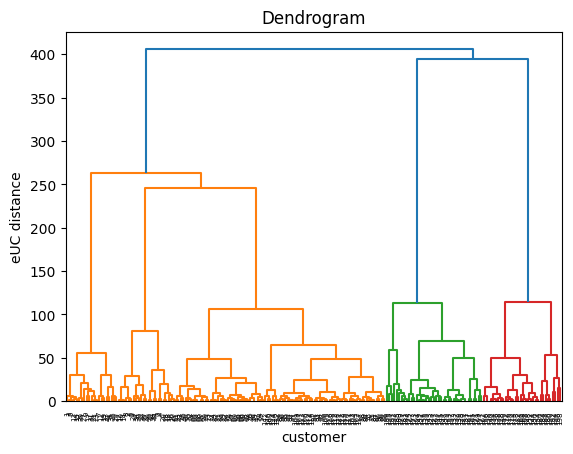

In [ ]:
"""Dendogram plot for finding the n number of clusters"""
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("customer")
plt.ylabel("eUC distance")
plt.show()

In [ ]:
"""Fitting the featues"""
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(features)

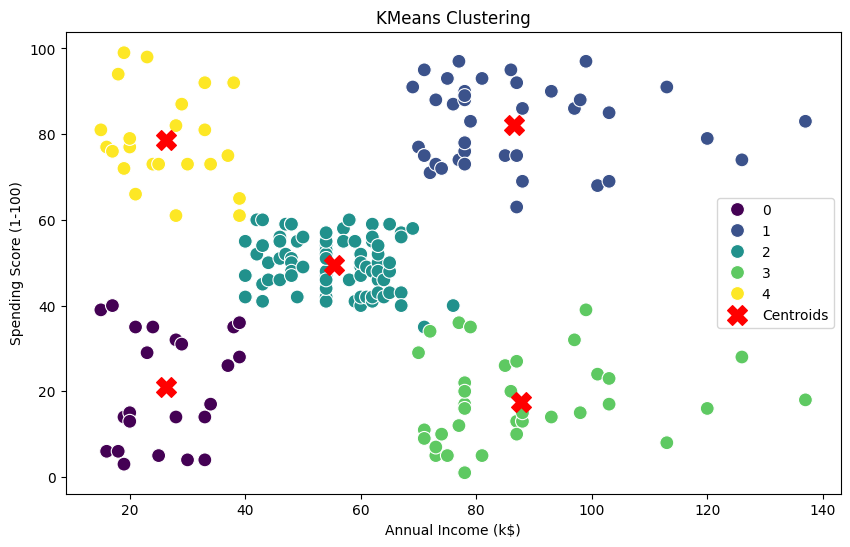

In [ ]:
"""Plot of KMeans clustering"""
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

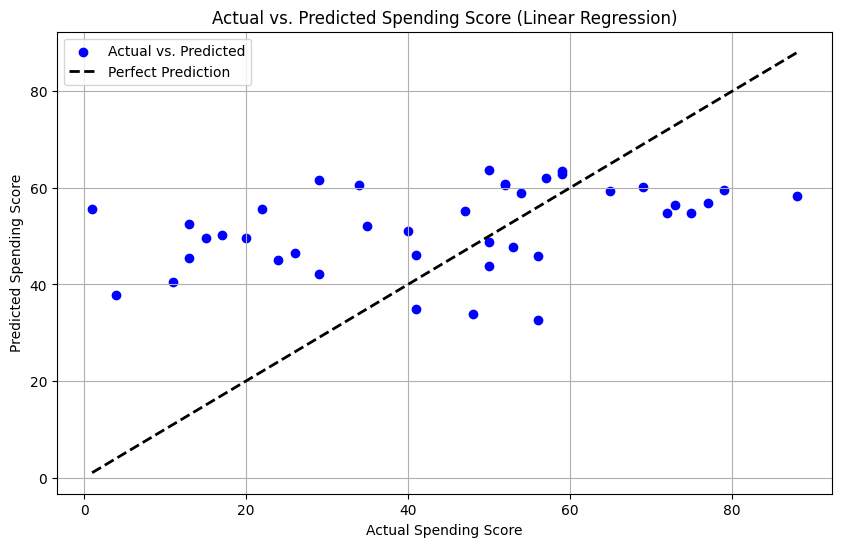

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Select features and target variable
X = df[['Age', 'Annual Income (k$)']]  # Features
y = df['Spending Score (1-100)']       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plotting the diagonal line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Customize plot

plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs. Predicted Spending Score (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


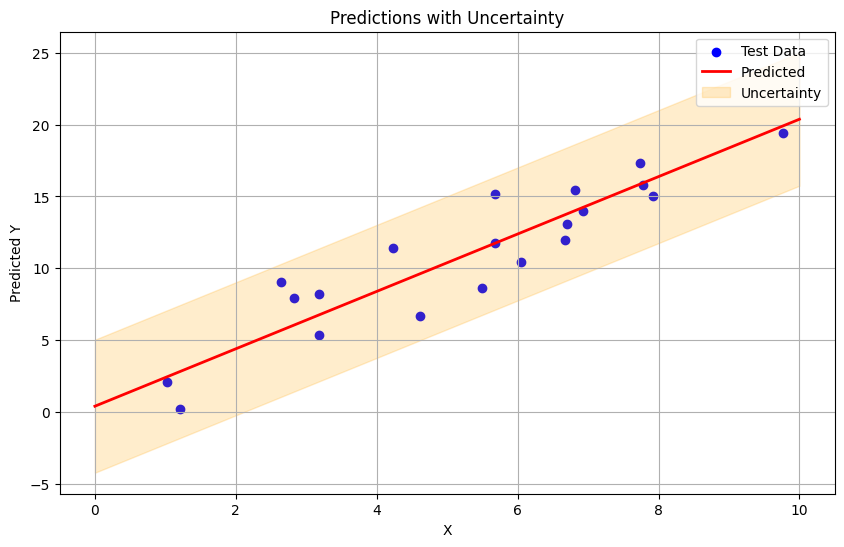

In [30]:


# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.normal(scale=2, size=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Generate additional data points for predictions
X_new = np.linspace(0, 10, 100).reshape(-1, 1)

# Predict for the new data points
y_pred_new = model.predict(X_new)

# Calculate uncertainties (standard deviation of predictions)
y_pred_std = np.std(y_pred)

# Plot original data and predictions with uncertainties
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Original test data
plt.plot(X_new, y_pred_new, color='red', label='Predicted', linewidth=2)  # Predicted values
plt.fill_between(X_new.squeeze(), y_pred_new - y_pred_std, y_pred_new + y_pred_std, color='orange', alpha=0.2, label='Uncertainty')  # Uncertainty region
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.title('Predictions with Uncertainty')
plt.legend()
plt.grid(True)
plt.show()
